# Classify the fashion MNIST dataset

This notebook gives a simple example on how to calssify the fashion MNIST dataset using a densely connected Neural Network in the TensorFlow 2.0 framework. The images are 28 x 28 gray scale images.
After building and training the network, two self made pictures with a convinient smartphone camera are preprocessed in order to feed them forward and classify the images.

The first part is from [Google's TF 2.0 page](https://www.tensorflow.org/beta/tutorials/keras/basic_classification)

## Preparing the processing environment

In [0]:
#install tensoflow 2.0.0 via pip
#use ! as an escape sign to execute shell commands
!pip install -q tensorflow==2.0.0

In [0]:
#restart your runtime

In [6]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import glob
import os
import matplotlib.pyplot as plt

print('TF version: {}'.format(tf.__version__))
print('keras version: {}'.format(tf.keras.__version__))
print('Built with cuda: {}'.format(tf.test.is_built_with_cuda()))
if tf.test.is_built_with_cuda == True:
    print('GPU: {}'.format(tf.test.gpu_device_name()))
    print(tf.test.is_built_with_gpu_support())
else:
    print('No GPU support available')

TF version: 2.0.0
keras version: 2.2.4-tf
Built with cuda: False
No GPU support available


In [1]:
#import colab package and mount you accounts associated google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
##create folder structure and clone git for the first time in to it
##use % as an meta escape sign to execute cd command
!mkdir ./drive/My\ Drive/repos
%cd /content/drive/My\ Drive/repos
!git clone https://github.com/thho/dl_ws

mkdir: cannot create directory ‘./drive/My Drive/repos’: File exists
/content/drive/My Drive/repos


In [3]:
#change into the dir, use % as an meta escape sign to execute cd command

%cd ./dl_ws/

/content/drive/My Drive/repos/dl_ws


In [0]:
#check your git for updates
#!git pull

## Importing packages and loading the dataset

In [0]:
#import the fashion MNIST dataset directly from TensorFlow

fashion_mnist = keras.datasets.fashion_mnist

#loading the dataset returns four numpy arrays
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [108]:
train_labels.shape[0]

60000

In [109]:
#check dataset structure
print('There are {} labels and {} images with a size of {} pixel'.format(
    train_labels.shape[0], train_images.shape[0], train_images.shape[1:3]))

There are 60000 labels and 60000 images with a size of (28, 28) pixel


In [0]:
#setting the class labels as list

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

## Image preprocessing

The imges have to be preprocessed, the pixel values should scale from 0 to 1 when using them in the NN

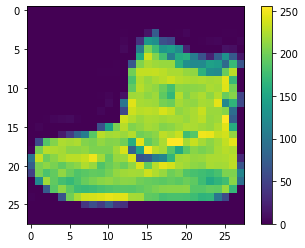

In [12]:
#plotting the first image of the training dataset
#calling a plot
plt.figure()
#passing the array to plot to the plot
plt.imshow(train_images[0])
#adding a color bar
plt.colorbar()
#rendering the plot
plt.show()

The next chunk normalizes the gray scale values to a range of $ [0,1] $

In [0]:
#normalize the the dataset values
train_images = train_images / 255
test_images = test_images / 255

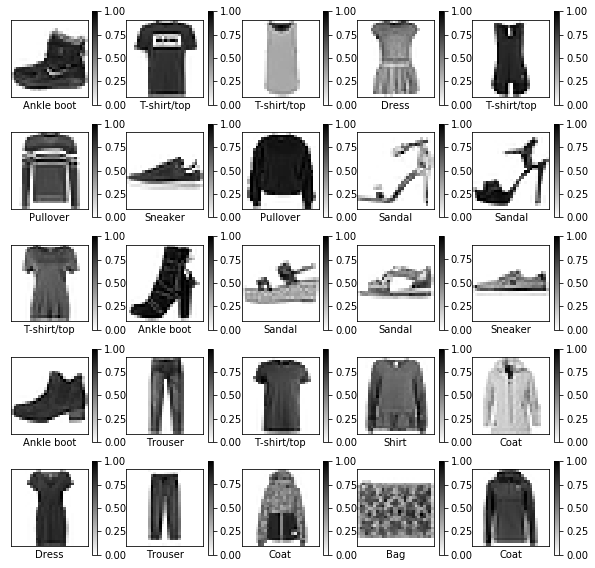

In [14]:
#for an overview lets plot the first 25 images of the dataset with their labels
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    plt.colorbar()
plt.show()

# Build a densely connected neural network model

Use ```keras.Sequential()``` to build a simple NN with two hidden layers 128 neurons each and ReLU activation. You map to 10 classes use softmax as output activation. 

In [0]:
#define the network's architecture

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


## Compile the model

In this step, you select the optimizer, the costfunction, called loss here and the metrics you want to track during training

In [0]:
#set additional network hyperparameter
EPOCHS=20
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

## Train the model

Use the ```model.fit()``` method to train your model! Record your training in a ```history```.

In [18]:
history = model.fit(x = train_images, y = train_labels, epochs=EPOCHS, validation_split=.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 6s 104us/sample - loss: 0.4958 - accuracy: 0.8249 - val_loss: 0.4198 - val_accuracy: 0.8400
Epoch 2/20
54000/54000 [==============================] - 5s 98us/sample - loss: 0.3679 - accuracy: 0.8666 - val_loss: 0.3725 - val_accuracy: 0.8678
Epoch 3/20
54000/54000 [==============================] - 5s 96us/sample - loss: 0.3337 - accuracy: 0.8771 - val_loss: 0.3226 - val_accuracy: 0.8793
Epoch 4/20
54000/54000 [==============================] - 5s 96us/sample - loss: 0.3082 - accuracy: 0.8864 - val_loss: 0.3235 - val_accuracy: 0.8808
Epoch 5/20
54000/54000 [==============================] - 5s 96us/sample - loss: 0.2926 - accuracy: 0.8918 - val_loss: 0.3227 - val_accuracy: 0.8837
Epoch 6/20
54000/54000 [==============================] - 5s 95us/sample - loss: 0.2751 - accuracy: 0.8979 - val_loss: 0.3257 - val_accuracy: 0.8865
Epoch 7/20
54000/54000 [==============================] 

In [0]:
def train_plot(hist=None):
  acc = hist.history['accuracy']
  val_acc = hist.history['val_accuracy']

  loss = hist.history['loss']
  val_loss = hist.history['val_loss']

  epochs_range = range(EPOCHS)

  plt.figure(figsize=(15, 10))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.show()

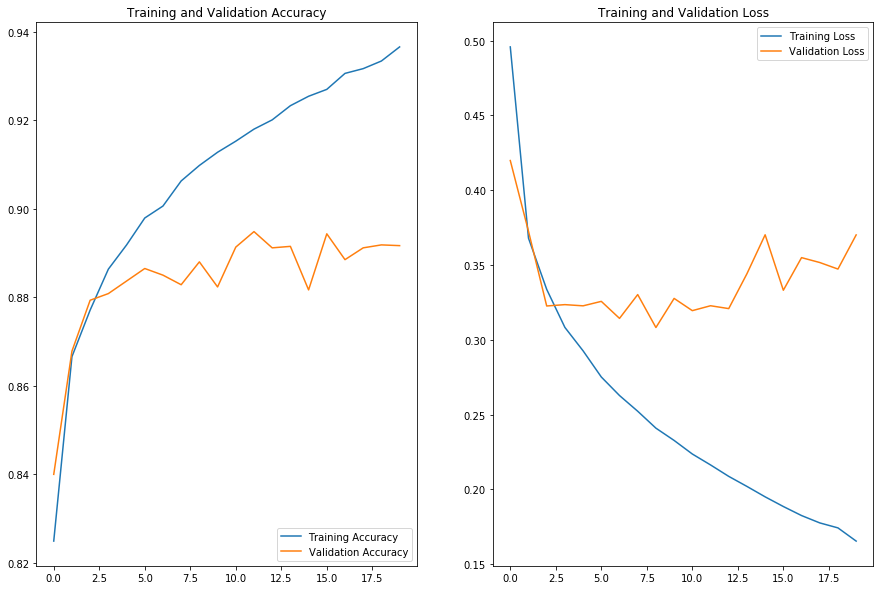

In [20]:
train_plot()

## Evaluate accuracy

To see how the model performs on unseen data, we use the test set.

In [21]:
#use the test data for model evaluation
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('\nTest accuracy:', test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

## Make predictions


In [0]:
#use the trained model for interference
predictions = model.predict(test_images)

In [23]:
#get the predictions for the first sample
predictions[0]

array([1.7646000e-08, 8.1523086e-14, 2.0044338e-08, 1.7115716e-12,
       3.4486244e-12, 1.0685859e-06, 1.0017859e-09, 6.7176024e-06,
       1.3609682e-12, 9.9999213e-01], dtype=float32)

In [24]:
#the highest probability of the prediction for the first image
max(predictions[0])

0.99999213

In [25]:
#get the name for the highest probability
class_names[np.argmax(predictions[0])]

'Ankle boot'

<function matplotlib.pyplot.show>

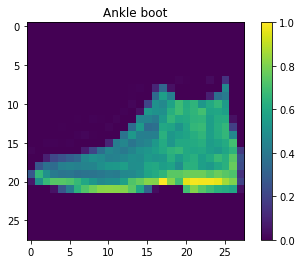

In [26]:
#plot the first picture with the prdicted class name
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.title(class_names[np.argmax(predictions[0])])
plt.show

# Now lets try some own data collected with a smart phone camera

## Preprocessing

We first have to reduce to grayscale and then to a 28 x 28 pixel size. We also have to normalize the values and put them in a object structure which can be passed to the neural net. In this case a np array which holds np array for each given picture with a structure of ($n$, 28 ,28)
where $n$ is the numer of images.

In [0]:
#for image processing we use the opencv (open computer vision) package
import cv2

In [0]:
#read image; you might have to adapt the path, but when you use the
#forkflow with mounting your google drive, it works just fine
img = cv2.imread('./cloth/coat_arms_val.jpg')

In [29]:
img.shape

(2960, 3120, 3)

In [0]:
#from the RGB image make a single grayscale image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#normalize the image as we did with the training data
gray = gray / 255

<function matplotlib.pyplot.show>

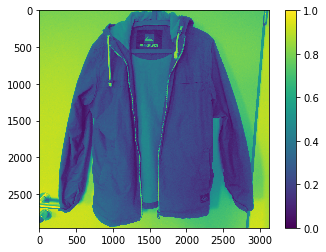

In [31]:
#plotting the grayscale image
plt.figure()
plt.imshow(gray)
plt.colorbar()
plt.show

In [0]:
#The image is to large (in width and hight) to pass it to the network
#we have to reuduce the image to a 28 x 28 image...
rs_gray = cv2.resize(gray, (28, 28))

<function matplotlib.pyplot.show>

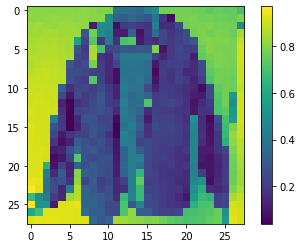

In [33]:
#plot the 28x28 resampled version of the image 
plt.figure()
plt.imshow(rs_gray)
plt.colorbar()
plt.show

In [0]:
#After that, we also have to create an object the network is made for, in this case, it is a 
#numpy array with the dimensions (n, 28, 28), where n is the number of images, we put in it
rs_gray = np.array([rs_gray])

In [35]:
rs_gray.shape

(1, 28, 28)

In [0]:
predictions = model.predict(rs_gray)

<function matplotlib.pyplot.show>

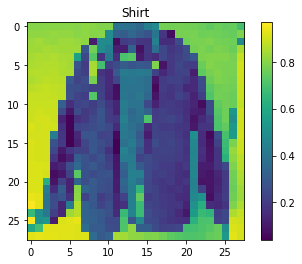

In [37]:
plt.figure()
plt.imshow(rs_gray[0])
plt.colorbar()
plt.title(class_names[np.argmax(predictions[0])])
plt.show

In [38]:
predictions

array([[1.42111803e-22, 0.00000000e+00, 4.30731307e-24, 0.00000000e+00,
        8.80371534e-38, 1.20517965e-17, 9.99877334e-01, 0.00000000e+00,
        1.22685349e-04, 9.13684816e-27]], dtype=float32)

## Processing multiple images

Now that we know our workflow works for a single custom image, we will write code for passing forward as many custom imgaes as we want to.

In [0]:
#get all jpg file paths
img_list = glob.glob("./cloth/*.jpg")

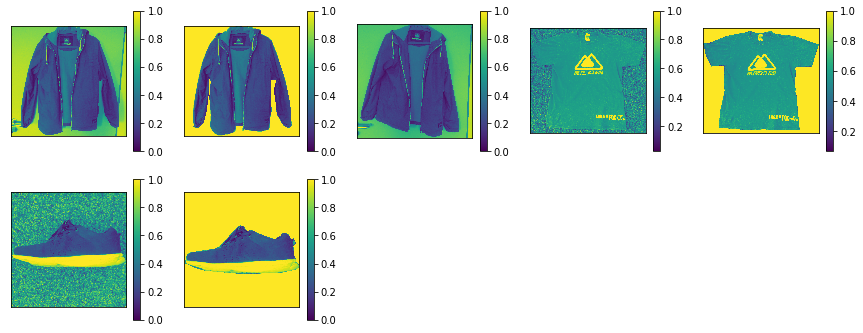

In [41]:
#plot all custom test images in their sensing resolution
plt.figure(figsize=(15,15))
for i in range(len(img_list)):
    img = cv2.imread(img_list[i])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = gray / 255
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(gray)
    plt.colorbar()
plt.show()

In [0]:
#prepare an object of type list to put all input images into it before
#making a numpy array out of it
ff_img = list([])

In [0]:
#reading all images of type jpg, and preprocess them in a for loop 
#one image after an other. Append each image to the prepared list object and
#finally make a np.array of the list holding all images we want to predict
for i in range(1,len(img_list)+1):
    img = cv2.imread(img_list[i-1])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    rs_gray = cv2.resize(gray, (28, 28))
    ff_img.append(rs_gray)

ff_img = np.array(ff_img) / 255
ff_img[ff_img==1]=0

<function matplotlib.pyplot.show>

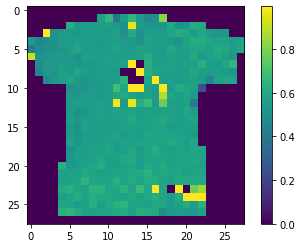

In [44]:
#plot one of the preprocessed images...looks like a shirt
plt.figure()
plt.imshow(ff_img[4])
plt.colorbar()
plt.show

In [0]:
#predict the classes for all custom images
predictions = model.predict(ff_img)

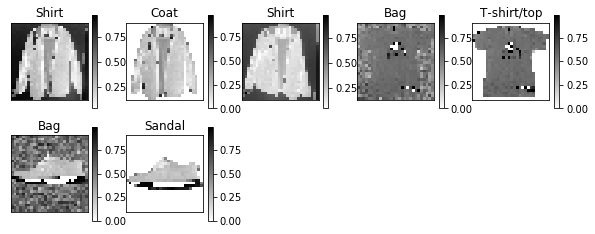

In [46]:
#plot all predicted images with their class names
plt.figure(figsize=(10,10))
for i in range(len(img_list)):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(ff_img[i], cmap=plt.cm.binary)
    plt.title(class_names[np.argmax(predictions[i])])
    plt.colorbar()
plt.show()

# Convolutional Neural Networks for image classfifcation

As we have seen in the previous example, the image classification using simple densely connected neural networks struggles with some kind of images, it is probably more focussed on simple edeges to classify an object as deep features. Using CNNs might solve this problem, let's find out how to build them in TF 2.0 and redo the classification and testing with data from the MNIST fashion dataset and the custom images!

In [0]:
from tensorflow.keras import layers

Since we are now working with images and convolutional layers, we have to define a slightly other structure of our input numpy arrays as we had before. We are now passing three dimensional tensors to the network of shape (height, width, depth). This enables us to pass for example a 700 x 700 pixel RGB image through the network by defining a 700 x 700 x 3 tensor. In order to do so, we simply reshape the arrays.

In [114]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

print(train_images.shape)
print(test_images.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


## Create a CNN

In [0]:
def cnn():
  x = inputs = keras.Input(shape=[28,28,1])
  x = layers.Conv2D(32, (3, 3), activation='relu', strides=2)(x)
  x = layers.Conv2D(64, (3, 3), activation='relu', strides=2)(x)
  x = layers.Conv2D(128, (3, 3), activation='relu', strides=2)(x)
  x = layers.Flatten()(x)
  x = layers.Dense(128, activation='relu')(x)
  x = layers.Dense(128, activation='relu')(x)
  x = layers.Dense(10, activation='softmax')(x)
  return keras.Model(inputs, x, name='CNN')

In [0]:
def cnn():
  x = inputs = keras.Input(shape=[28,28,1])
  x = layers.Conv2D(32, (3, 3), activation='relu')(x)
  x = layers.MaxPooling2D((2,2))(x)
  x = layers.Conv2D(64, (3, 3), activation='relu')(x)
  x = layers.Conv2D(128, (3, 3), activation='relu')(x)
  x = layers.Conv2D(128, (3, 3), activation='relu')(x)
  x = layers.Flatten()(x)
  x = layers.Dense(128, activation='relu')(x)
  x = layers.Dense(64, activation='relu')(x)
  x = layers.Dense(10, activation='softmax')(x)
  return keras.Model(inputs, x, name='CNN')

In [0]:
def cnn():
  x = inputs = keras.Input(shape=[28,28,1])
  x = layers.Conv2D(32, (3, 3), activation='relu')(x)
  x = layers.MaxPooling2D((2,2))(x)
  x = layers.Conv2D(64, (3, 3), activation='relu')(x)
  x = layers.MaxPooling2D((2,2))(x)
  x = layers.Conv2D(64, (3, 3), activation='relu')(x)
  x = layers.MaxPooling2D((2,2))(x)
  x = layers.Flatten()(x)
  x = layers.Dense(128, activation='relu')(x)
  x = layers.Dense(64, activation='relu')(x)
  x = layers.Dense(10, activation='softmax')(x)
  return keras.Model(inputs, x, name='CNN')

In [0]:
model_cnn = cnn()

In [122]:
model_cnn.summary()

Model: "CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 1, 1, 64)          0       

In [0]:
model_cnn.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

## Train and evaluate the model

After our CNN has been built, we can start training and evaluation:

In [125]:
#training the model
history_cnn = model_cnn.fit(x = train_images, y = train_labels, epochs=EPOCHS, validation_split=.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 61s 1ms/sample - loss: 0.5295 - accuracy: 0.8056 - val_loss: 0.4323 - val_accuracy: 0.8430
Epoch 2/20
54000/54000 [==============================] - 59s 1ms/sample - loss: 0.3929 - accuracy: 0.8554 - val_loss: 0.3563 - val_accuracy: 0.8698
Epoch 3/20
54000/54000 [==============================] - 57s 1ms/sample - loss: 0.3396 - accuracy: 0.8743 - val_loss: 0.3516 - val_accuracy: 0.8713
Epoch 4/20
54000/54000 [==============================] - 57s 1ms/sample - loss: 0.3027 - accuracy: 0.8875 - val_loss: 0.3085 - val_accuracy: 0.8877
Epoch 5/20
54000/54000 [==============================] - 58s 1ms/sample - loss: 0.2754 - accuracy: 0.8977 - val_loss: 0.3057 - val_accuracy: 0.8875
Epoch 6/20
54000/54000 [==============================] - 57s 1ms/sample - loss: 0.2577 - accuracy: 0.9033 - val_loss: 0.3002 - val_accuracy: 0.8920
Epoch 7/20
54000/54000 [==============================] -

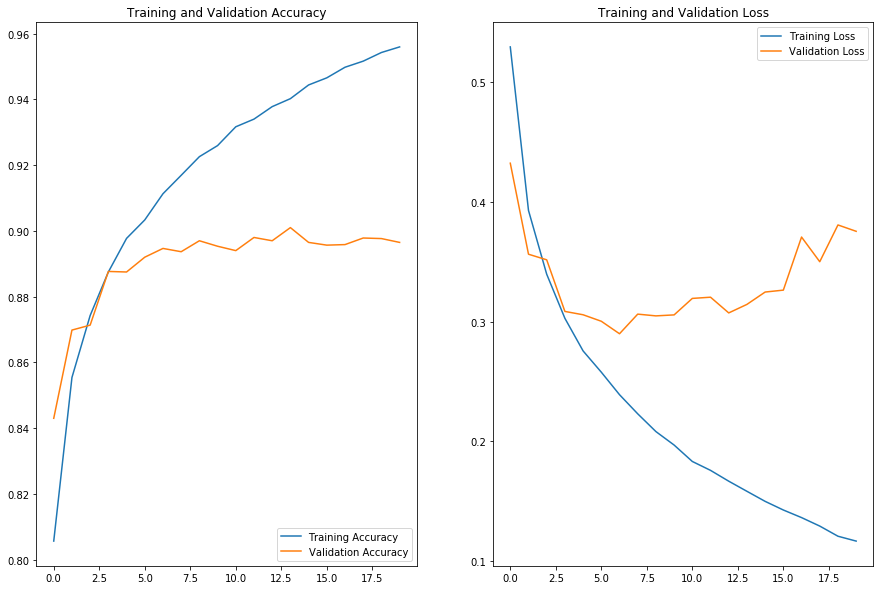

In [126]:
train_plot(history_cnn)

In [127]:
test_loss, test_acc = model_cnn.evaluate(test_images, test_labels)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [128]:
print(ff_img.shape)

(7, 28, 28)


In [129]:
#reshape for CNN input
ff_img = ff_img.reshape((7, 28, 28, 1))
print(ff_img.shape)

(7, 28, 28, 1)


In [0]:
#predict the classes for all custom images
predictions_cnn = model_cnn.predict(ff_img)

In [131]:
#rereshape to plot data
ff_img = ff_img.reshape((7, 28, 28))
print(ff_img.shape)

(7, 28, 28)


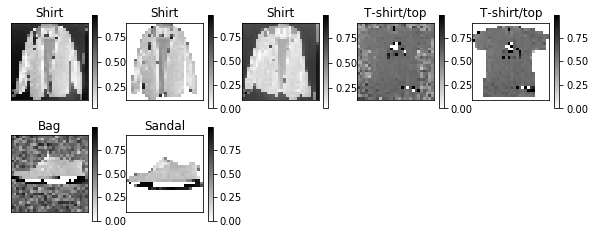

In [132]:
#plot all predicted images with their class names
plt.figure(figsize=(10,10))
for i in range(len(img_list)):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(ff_img[i], cmap=plt.cm.binary)
    plt.title(class_names[np.argmax(predictions_cnn[i])])
    plt.colorbar()
plt.show()